<a href="https://colab.research.google.com/github/RohitBiswas-1998/Projects/blob/master/Pycaret_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **What is PYCARET?**

---





*  PyCaret is an open-source machine learning library in Python that aims to simplify the end-to-end machine learning process.

















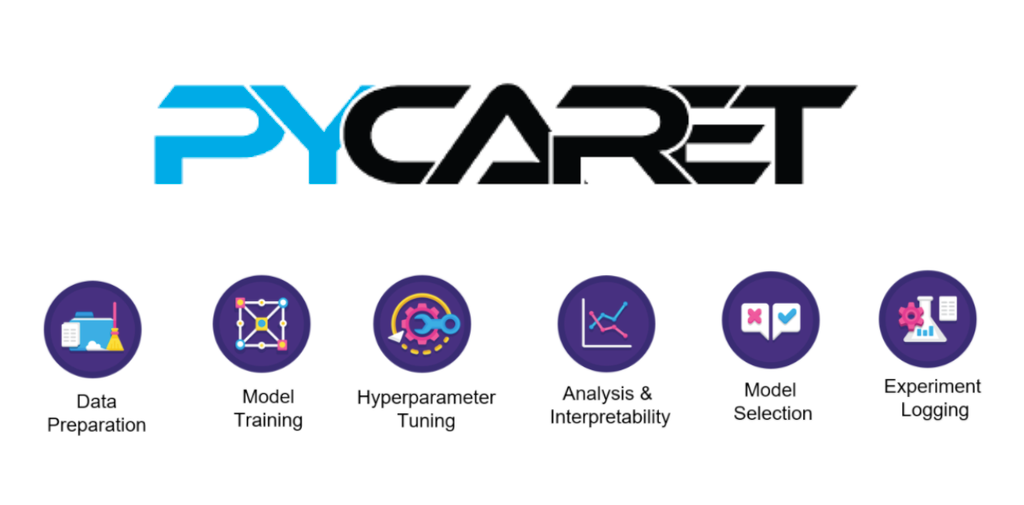




### **Why PYCARET?**

---



*   PyCaret automates many of the repetitive tasks involved in machine learning, allowing users to focus more on experimenting with different models and optimizing their performance.


*   Pycaret provides functionality for handling common data types like numerical, categorical, and text data.


*   PyCaret supports a wide range of machine learning algorithms, including linear regression, logistic regression, decision trees, random forests, gradient boosting, support vector machines, and many more.



*  Pycaret provides a high-level interface for performing various tasks such as data preprocessing, feature selection, model training, hyperparameter tuning, and model evaluation.

*   Additionally, PyCaret offers tools for model interpretation, ensemble modeling, and deployment of machine learning models.



*   With PyCaret, you can also build and compare multiple models using a few lines of code. It follows a standardized workflow and provides intuitive functions to carry out various steps in the machine learning pipeline. PyCaret integrates with popular libraries like scikit-learn, XGBoost, LightGBM, and CatBoost, making it easy to leverage their capabilities within the PyCaret framework.









# **Now, How to employ PYCARET for the magic?**

---



Let me show it to you!









# **Problem Statement -**

Build a regression model for predicting insurance costs based on different factors such as age, BMI (Body Mass Index), number of children, smoking habits, and region.


---



***Data description -***


1.   Age: Age of the individual in years.
2.   Sex: Gender of the individual (male or female).
3.   BMI: Body Mass Index, a measure of body fat based on height and weight.
4.   Children: Number of children the individual has.
5.   Smoker: Indicates if the individual is a smoker (yes or no).
6.   Region: Geographic region of the individual (e.g., northeast, northwest, southeast, southwest).
7.  Charges: Medical insurance charges for the individual (the target variable).

---



Importing libraries and installing pycaret

In [ ]:
import pandas as pd

In [ ]:
pip install pycaret==3.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Lets load and **take** a closer look at our given dataset

In [ ]:
from pycaret.datasets import get_data

In [ ]:
df = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#dimension of our dataset - 1338 rows and 7 columns
df.shape

(1338, 7)

In [ ]:
#Tells us variable level information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#the missing values for each variables -  no missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# statistical description of all the variables - NaN represents not a number and NaN appeared in the below table as there's an attempt to use numerical operations on a categorical variable.
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


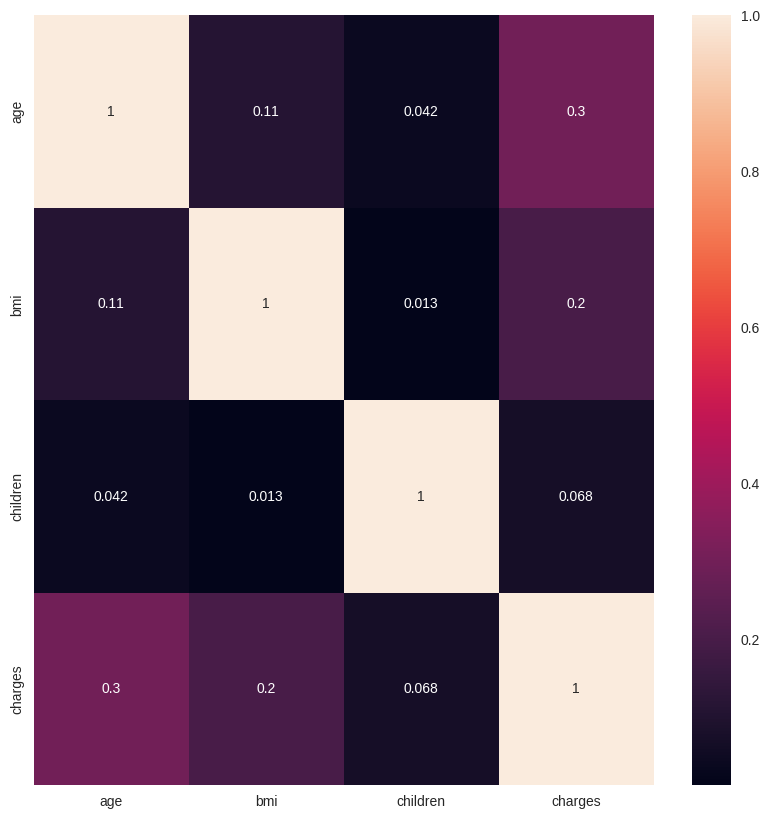

In [ ]:
# Seaborn and matplotlib are visualization libraries
# Plotting Correlation matrix, corr. matrix helps us to identify the existence of linear realtionship between vars specifically between independent vars, helping us to avoid the issue of multicollinearity.
# Here, there's no issue of multicollinearity.
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
corr_matrix = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, annot = True)
plt.show()

Train and holdout data split

In [ ]:
# the train dataset is on which the model is built
# the holdout data refers to a separate dataset that is kept aside and not used during the model training process. It is typically used to evaluate the final performance of the trained model on unseen data.
train_data = df.sample(frac=0.8, random_state=42)
holdout_data = df.drop(train_data.index)

Setting up the regression function in pycaret

In [ ]:
from pycaret.regression import *

Lets start building models!

Link to regression documentation, you shall find all the techniques available during any step in your modelling exercise using pycaret - https://pycaret.readthedocs.io/en/latest/api/regression.html

In [ ]:
# The target variable is the dependent variable.
# The train and test split is at 70-30 by default but one can change it as per their modelling technique.
# The regression setup automatically encodes the categorical variables using 'One hot encoding' but we do have the choose to alter the encoding technique while settig up the reg func.
# For missing value treatment, pycaret reg setup automatically employs mean approach for numeric imputation and mode approach for categorical imputation
# We can also opt for Normalization techniques, outlier treatment, PCA, transformation techniques, cross validation folds (default is K-means with 10 folds) and whole lot more, experiment and explore - link attched above.
# Here, I am going to try a simple build as we have a not so complex dataset, will just try transformation and the issue of encoding is automatically solved due to built in one hot encoding technique.
# The default transformation technique used here is 'yeo-johnson' appraoch, which is a generalisation of box-cox with no restrictions.

reg = setup(train_data,target='charges', transformation=True,remove_multicollinearity=True)

,Description,Value
0,Session id,6684
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1070, 7)"
4,Transformed data shape,"(1070, 10)"
5,Transformed train set shape,"(749, 10)"
6,Transformed test set shape,"(321, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


The techniques availble in compare_models() func -

pycaret.regression.compare_models(include: Optional[List[Union[str, Any]]] = None, exclude: Optional[List[str]] = None, fold: Optional[Union[int, Any]] = None, round: int = 4, cross_validation: bool = True, sort: str = 'R2', n_select: int = 1, budget_time: Optional[float] = None, turbo: bool = True, errors: str = 'ignore', fit_kwargs: Optional[dict] = None, groups: Optional[Union[str, Any]] = None, experiment_custom_tags: Optional[Dict[str, Any]] = None, engine: Optional[Dict[str, str]] = None, verbose: bool = True, parallel: Optional[ParallelBackend] = None)

In [ ]:
# Lets fit a wide range of problems and check their efficiency
# The default set of metrics are - Mean absolute error, Mean square error, root mean square error, Root Mean Squared Logarithmic Error and Mean Absolute Percentage Error which are various functions of RSS.

models = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2413.6329,20405501.9259,4445.2478,0.8541,0.4432,0.2930,0.8250
rf,Random Forest Regressor,2502.8786,21451420.7639,4545.3557,0.8463,0.4614,0.3157,1.1620
lightgbm,Light Gradient Boosting Machine,2697.8591,21717732.1999,4561.7978,0.8444,0.5223,0.3498,0.8350
et,Extra Trees Regressor,2564.8064,24477692.4120,4858.7988,0.8237,0.4662,0.3069,0.9770
ada,AdaBoost Regressor,4048.9807,26397593.7257,5084.3545,0.8131,0.6209,0.7145,0.5400
xgboost,Extreme Gradient Boosting,2902.8192,26537692.9000,5092.6832,0.8112,0.5728,0.3764,0.5820
llar,Lasso Least Angle Regression,4240.6051,36065929.7754,5983.2418,0.7458,0.5498,0.4219,0.6320
br,Bayesian Ridge,4247.8043,36067118.9690,5983.5104,0.7458,0.5500,0.4230,0.4380
lr,Linear Regression,4238.7501,36068634.7222,5983.4106,0.7458,0.5484,0.4216,1.1190
lar,Least Angle Regression,4238.7501,36068634.7222,5983.4106,0.7458,0.5484,0.4216,0.4510


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Model selection and hyparameter tuning technique with pycaret

In [ ]:
#Lets take MAE as our primary metric and based on that, we shall go ahead with gradient boosting regressor and Random forest regressor.

# Gradient Boosting Regressor
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2217.5533,15847196.8919,3980.8538,0.9019,0.4408,0.2486
1,2491.3265,22704735.9870,4764.9487,0.8257,0.4948,0.2990
2,2320.4579,17615670.5142,4197.1026,0.8881,0.4204,0.2885
3,1990.3888,11039821.8722,3322.6227,0.9451,0.3857,0.3331
4,2658.2666,20768856.3336,4557.2861,0.8129,0.5275,0.4524
5,2731.6720,25635786.3411,5063.1795,0.7931,0.4650,0.2155
6,2089.2997,11853356.9680,3442.8705,0.9303,0.3664,0.2761
7,3109.5416,39188924.5229,6260.1058,0.7629,0.5242,0.2915
8,2079.7754,17531249.6954,4187.0335,0.8660,0.4296,0.2252


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Random Forest Regressor
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2429.2136,18580262.9693,4310.4829,0.8849,0.4625,0.3085
1,2309.8203,19922402.4570,4463.4519,0.8470,0.4360,0.2652
2,2612.9122,20470798.8232,4524.4667,0.8700,0.4716,0.3592
3,1971.1733,10875893.2836,3297.8619,0.9459,0.3670,0.3183
4,2542.3680,18692862.8113,4323.5244,0.8316,0.5553,0.4944
5,2936.4979,27364869.3982,5231.1442,0.7791,0.5062,0.2570
6,1742.8642,10299870.0444,3209.3411,0.9395,0.3087,0.2043
7,3149.9578,40050289.0850,6328.5298,0.7577,0.5274,0.2558
8,2111.9428,18862105.0046,4343.0525,0.8559,0.4638,0.2131


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Hyperparameter tuning for the random forest regressor model
tune_rf=tune_model(rf,optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1617.4744,14164212.0481,3763.5372,0.9123,0.3437,0.1210
1,1770.7876,20414095.4650,4518.1960,0.8432,0.4044,0.1354
2,1671.9213,15767349.7755,3970.8122,0.8998,0.3616,0.1264
3,1185.7100,8824971.8735,2970.6854,0.9561,0.2234,0.1217
4,1722.2368,20043666.1163,4477.0153,0.8195,0.4035,0.1439
5,2305.5500,27021236.2955,5198.1955,0.7819,0.4721,0.1550
6,1238.7065,7959564.9021,2821.2701,0.9532,0.2387,0.1107
7,2709.8361,40641969.6574,6375.1055,0.7541,0.5181,0.1545
8,1443.4943,15598696.7228,3949.5185,0.8808,0.3928,0.1129


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#pycaret automatically chose to tune the below hyperparameters and it did reduce our MAE.
tune_rf

RandomForestRegressor(criterion='absolute_error', max_depth=9,
                      min_impurity_decrease=0.02, min_samples_leaf=5,
                      min_samples_split=9, n_estimators=50, n_jobs=-1,
                      random_state=6684)

Stacking, Ensembling and Blending techniques

In [ ]:
#stacking techinque involves training multiple individual models and then using another model, called a meta-model or blender, to make predictions based on the outputs of the individual models.

stacked_model = stack_models(estimator_list=[gbr,rf],meta_model=tune_rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1539.5401,13421250.4569,3663.5025,0.9169,0.3310,0.1316
1,1948.9671,21141366.2772,4597.9741,0.8377,0.4505,0.2038
2,1925.8057,18006133.3946,4243.3635,0.8856,0.4622,0.2752
3,1206.9462,9297974.1429,3049.2580,0.9537,0.2849,0.1457
4,1924.2290,20393506.8311,4515.9171,0.8163,0.4320,0.2052
5,2322.6753,26657437.4940,5163.0841,0.7848,0.4580,0.1537
6,1324.6789,8162715.5380,2857.0466,0.9520,0.2371,0.1191
7,2740.9427,39609255.7548,6293.5885,0.7604,0.5075,0.1878
8,1581.2135,16156070.0556,4019.4614,0.8765,0.3955,0.1264


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
#Ensembling is a technique in machine learning where multiple models are combined to make more accurate predictions than any individual model. It leverages the diversity and complementary strengths of different models to improve overall performance.
#I am using boosting approach here, you can try with bagging too
#MAE comes out to be higher, not a great result

en_rf = ensemble_model(rf,method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3049.1744,20564923.9818,4534.8566,0.8727,0.5084,0.4433
1,2886.3863,23355826.5009,4832.7866,0.8207,0.5157,0.4030
2,3034.7733,21843222.0405,4673.6733,0.8612,0.5367,0.4818
3,2684.4830,16042119.6423,4005.2615,0.9202,0.4611,0.4662
4,3597.1090,27968816.9726,5288.5553,0.7481,0.6842,0.7854
5,3426.4427,28076912.7674,5298.7652,0.7734,0.5247,0.3297
6,2283.2720,12460200.5047,3529.9009,0.9268,0.3435,0.2788
7,3644.9896,39643498.8149,6296.3083,0.7601,0.5591,0.3793
8,2649.2712,21873700.5298,4676.9328,0.8328,0.5452,0.3818


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
#Blending is similar to stacking, but it involves splitting the training data into two parts: one for training the base models and another for training the meta-model. The base models are trained on the first part, and their predictions are used as input features for training the meta-model on the second part. Blending aims to reduce the risk of overfitting compared to stacking.


blended_model = blend_models(estimator_list=[gbr,rf])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2277.1291,16599261.8086,4074.2192,0.8972,0.4469,0.2762
1,2348.0065,20785533.5067,4559.1154,0.8404,0.4582,0.2777
2,2416.4104,18237682.6711,4270.5600,0.8841,0.4362,0.3210
3,1954.1407,10164695.7414,3188.2120,0.9494,0.3658,0.3241
4,2587.5977,18836586.4105,4340.1136,0.8303,0.5347,0.4724
5,2764.4362,25825166.6076,5081.8468,0.7915,0.4790,0.2298
6,1845.5350,10301023.6431,3209.5208,0.9395,0.3313,0.2347
7,3070.7639,39169343.3008,6258.5416,0.7630,0.5143,0.2635
8,2066.5599,17610109.5965,4196.4401,0.8654,0.4373,0.2157


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Post all experimentation, the tune_rf model acts the best during development MAE

In [ ]:
#lets predict now with our tune_rf model
#so the model predicts at MAE with the holdout sample
predict_charges = predict_model(tune_rf,holdout_data)
predicted_values = predict_charges['charges']
predicted_values


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2047.3272,24929045.7822,4992.8995,0.8403,0.4093,0.1474


1        1725.552246
8        6406.410645
13      11090.717773
14      39611.757812
16      10797.335938
            ...     
1304    21259.378906
1305     2464.618896
1315    11272.331055
1318    19496.718750
1325    13143.336914
Name: charges, Length: 268, dtype: float32

Lets do some visualization of the model for model interpretation exercise

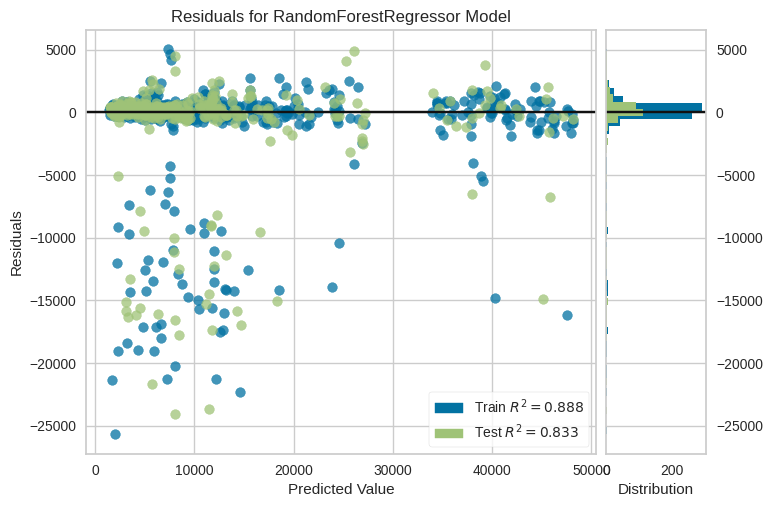

In [ ]:
#After fitting a regression model, examining the residual plot can provide valuable insights into the model's performance and the validity of its assumptions.
#here, I detect presence of few outliers as the issue which can be treated in the regression setup function.
#the residuals follow a normal distribution, so that's postive and if we recall, we did a transformation exercise during reg setup.
plot_model(tune_rf)

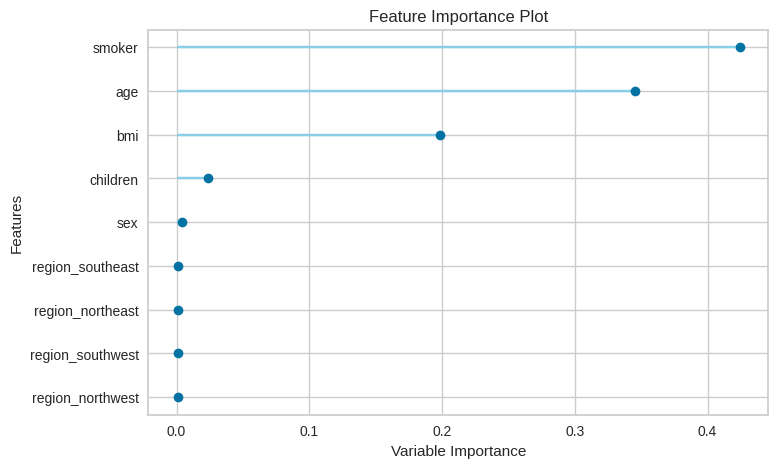

In [ ]:
#the feature 'smoker' has the most importance during model development and that's logical as smoking habits affect one's health and therefore, higher insurance charges.

plot_model(tune_rf, plot='feature')

Some more visualization plots

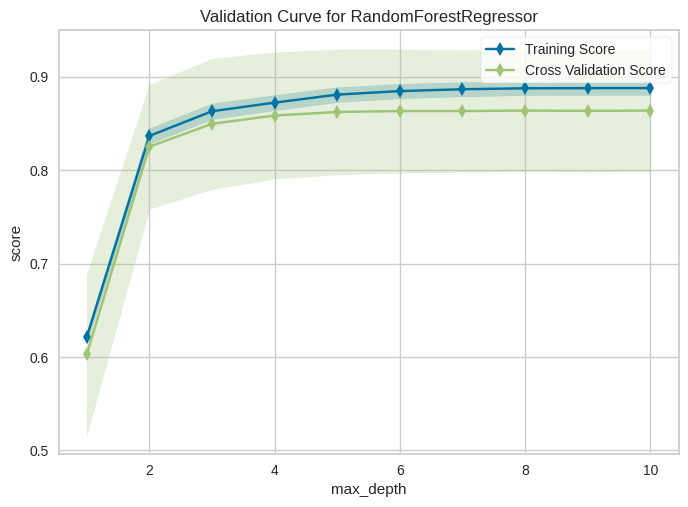

In [ ]:
#validation curve taking the primary hyperparameter 'max_depth' plotted against score and max_depth at 8 was used during development.
#The max_depth hyperparameter in the Random Forest algorithm specifies the maximum depth of the decision trees in the forest. It controls the depth of each individual tree in the ensemble.
#A higher value of max_depth allows the trees to grow deeper and capture more complex relationships in the data. However, increasing max_depth can also lead to overfitting.

plot_model(tune_rf, plot='vc')

# Finally, its time to end our project here...there more to explore and experiment with PYCARET.
# PYCARET is a phenomenal attempt to increase efficiency and it allows the room experimentation and innovation in our analyses without coding constraints.
# Developers of pycaret are keeping on improving the ecosystem with multiple new features, looking forward to them. 😀